<a href="https://colab.research.google.com/github/Jace-Hambrick/projects/blob/master/steam%20games/Steam_Games_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import ssl
from google.colab import files
!pip install category_encoders==2.*

     |████████████████████████████████| 81kB 2.9MB/s 


In [2]:
!pip install dash==1.12.0

     |████████████████████████████████| 71kB 2.3MB/s 
     |████████████████████████████████| 1.2MB 10.3MB/s 
     |████████████████████████████████| 3.4MB 27.9MB/s 
     |████████████████████████████████| 194kB 42.0MB/s 
     |████████████████████████████████| 1.8MB 30.6MB/s 
     |████████████████████████████████| 358kB 43.2MB/s 
  Created wheel for dash: filename=dash-1.12.0-cp36-none-any.whl size=73892 sha256=e3d1a880067c3aefaa4230a0b1c877e074871857fbc834a3d4bf3b3e9a7e7e5e
  Stored in directory: /root/.cache/pip/wheels/2e/bc/dd/b4ebecb434c90eff7c5475efc10b72aad5a899c01fa87e2647
  Created wheel for flask-compress: filename=Flask_Compress-1.5.0-cp36-none-any.whl size=5273 sha256=b20cb44aacdf06a85ac58d1484ab94b1b58866399ac533448a600d376721a087
  Stored in directory: /root/.cache/pip/wheels/f7/e9/e4/5afc286be7c87461375e33152558415dfeb0c8f5af3b50e742
  Created wheel for dash-renderer: filename=dash_renderer-1.4.1-cp36-none-any.whl size=1165597 sha256=85d4f38a8315936604e907af13272a89dc8f

In [5]:
#import the dataset from my computer

uploaded = files.upload()

Saving steam.csv to steam.csv


In [0]:
games = pd.read_csv('steam.csv')

In [7]:
games

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


In [16]:
games.nunique()


appid               27075
name                27033
release_date         2619
english                 2
developer           17113
publisher           14354
platforms               7
required_age            6
categories           3333
genres               1552
steamspy_tags        6423
achievements          410
positive_ratings     2800
negative_ratings     1492
average_playtime     1345
median_playtime      1312
owners                 13
price                 282
dtype: int64

In [17]:
games['genres'].unique

<bound method Series.unique of 0                        Action
1                        Action
2                        Action
3                        Action
4                        Action
                  ...          
27070    Adventure;Casual;Indie
27071    Action;Adventure;Indie
27072       Action;Casual;Indie
27073    Adventure;Casual;Indie
27074    Adventure;Casual;Indie
Name: genres, Length: 27075, dtype: object>

In [18]:
games['platforms'].nunique

<bound method IndexOpsMixin.nunique of 0        windows;mac;linux
1        windows;mac;linux
2        windows;mac;linux
3        windows;mac;linux
4        windows;mac;linux
               ...        
27070              windows
27071              windows
27072              windows
27073          windows;mac
27074          windows;mac
Name: platforms, Length: 27075, dtype: object>

In [0]:
#set(games['steamspy_tags'])
derp= games['steamspy_tags'].str.split(';',n=-1, expand=True)

In [0]:
master_derp = set(derp.stack())

In [0]:
whoop= pd.Series(derp.stack())

In [22]:
whoop.value_counts()[whoop.value_counts(normalize=True) > .005].keys()

Index(['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation',
       'Early Access', 'RPG', 'Free to Play', 'Puzzle', 'VR', 'Sports',
       'Racing', 'Platformer', 'Nudity', 'Sexual Content', 'Visual Novel',
       'Violent', 'Anime', 'Horror', 'Point & Click', 'Gore', 'Hidden Object',
       'Multiplayer', 'FPS'],
      dtype='object')

In [0]:
kept_cat = whoop.value_counts()[whoop.value_counts(normalize=True) > .005].keys()

In [0]:
import numpy as np

for i in kept_cat:
  games[i] = np.where(games['steamspy_tags'].str.contains(i), True, np.nan)

In [0]:
derptacular =  games['genres'].str.split(';',n=-1, expand=True)

In [0]:
testular = pd.Series(derptacular.stack())

In [27]:
testular.value_counts()[testular.value_counts(normalize=True) > .001].keys()

Index(['Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation',
       'RPG', 'Early Access', 'Free to Play', 'Sports', 'Racing', 'Violent',
       'Massively Multiplayer', 'Gore', 'Nudity', 'Sexual Content',
       'Utilities', 'Design & Illustration', 'Animation & Modeling'],
      dtype='object')

In [0]:
kept_gene = testular.value_counts()[testular.value_counts(normalize=True) > .001].keys()

In [0]:
for i in kept_gene:
  games[i] = np.where(games['genres'].str.contains(i), True, np.nan)

In [30]:
games.iloc[4]['FPS']

1.0

In [0]:
derpif = games['platforms'].str.split(';',n=-1, expand=True)

In [0]:
testy = pd.Series(derpif.stack())

In [0]:
plat_kept = testy.value_counts().keys()

In [0]:
for i in plat_kept:
  games[i] = np.where(games['platforms'].str.contains(i), True, np.nan)

In [0]:
derpcat = games['categories'].str.split(';',n=-1, expand=True)

In [0]:
catsup = pd.Series(derpcat.stack())

In [0]:
catkept = catsup.value_counts().keys()

In [38]:
for i in catkept:
  games[i] = np.where(games['categories'].str.contains(i), True, np.nan)

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [0]:
derpy =  games['developer'].str.split(n=-1, expand=True)

In [0]:
derpytest = pd.Series(derpy.stack())

In [0]:
derpytesty = derpytest.value_counts().keys()

In [42]:
derpytesty

Index(['Games', 'Studios', 'Studio', 'Entertainment', 'Inc.', 'Interactive',
       'LLC', 'Software', 'Game', 'Ltd.',
       ...
       'Taploft', 'Youxicehuahuisuo', 'sp.', 'SleepNinja', 'LagunVictor',
       'AO2Game', 'Burst', 'BloodMoon', 'Dincicode', 'Phenomenon'],
      dtype='object', length=18845)

In [43]:
j = 'FPS'
games.iloc[1][j]

1.0

In [0]:
import pdb

In [0]:
games['release_date'] =  pd.to_datetime(games['release_date'])

In [0]:
games['release_date'] = pd.DatetimeIndex(games['release_date']).year

In [47]:
games

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Indie,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,VR,Sports,Racing,Platformer,Nudity,Sexual Content,Visual Novel,Violent,Anime,Horror,Point & Click,Gore,Hidden Object,Multiplayer,FPS,Massively Multiplayer,Utilities,Design & Illustration,Animation & Modeling,windows,mac,linux,Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud,Full controller support,Partial Controller Support,Multi-player,Steam Leaderboards,Online Multi-Player,Shared/Split Screen,Stats,Co-op,Local Multi-Player,Cross-Platform Multiplayer,Online Co-op,Local Co-op,Includes level editor,Steam Workshop,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods,Mods (require HL2)
0,10,Counter-Strike,2000,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,20,Team Fortress Classic,1999,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,30,Day of Defeat,2003,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,40,Deathmatch Classic,2001,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,50,Half-Life: Opposing Force,1999,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27071,1065570,Cyber Gun,2019,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie

In [0]:
plotler= games.copy()

In [0]:
plotler['owners'] = plotler['owners'].replace('0-20000',20000)
plotler['owners'] = plotler['owners'].replace('20000-50000',50000)
plotler['owners'] = plotler['owners'].replace('50000-100000',100000)
plotler['owners'] = plotler['owners'].replace('100000-200000',200000)
plotler['owners'] = plotler['owners'].replace('200000-500000',500000)
plotler['owners'] = plotler['owners'].replace('500000-1000000',1000000)
plotler['owners'] = plotler['owners'].replace('1000000-2000000',2000000)
plotler['owners'] = plotler['owners'].replace('2000000-5000000',5000000)
plotler['owners'] = plotler['owners'].replace('5000000-10000000',10000000)
plotler['owners'] = plotler['owners'].replace('10000000-20000000',20000000)
plotler['owners'] = plotler['owners'].replace('20000000-50000000',50000000)
plotler['owners'] = plotler['owners'].replace('50000000-100000000',100000000)
plotler['owners'] = plotler['owners'].replace('100000000-200000000',100000000)

In [0]:
wtf = plotler[plotler['positive_ratings']>50000]

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
fig1 = px.scatter(wtf, x="name", y="owners", color="name")
fig1.update_layout(showlegend=False)
fig1.update_layout(
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ))
fig1.update_layout( title= {'text': "<b>Number of Owners for the Most Popular Games</b>",'xanchor': 'center','yanchor': 'top','y':1,'x':0.5,},
        xaxis_title = '<b>Name of the Game</b>',
        yaxis_title = '<b>Approximate Number of Owners</b>',
        font=dict(
        family="Times New Roman",
        size=18,
    )
)
fig1.write_html("numberofowners.html")
fig1.show()

In [0]:
df2 = games.drop(columns=['appid','categories','genres','steamspy_tags','platforms','name','publisher','developer'])

In [0]:
df = df2.fillna(0)

In [50]:
df

,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Indie,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,VR,Sports,Racing,Platformer,Nudity,Sexual Content,Visual Novel,Violent,Anime,Horror,Point & Click,Gore,Hidden Object,Multiplayer,FPS,Massively Multiplayer,Utilities,Design & Illustration,Animation & Modeling,windows,mac,linux,Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud,Full controller support,Partial Controller Support,Multi-player,Steam Leaderboards,Online Multi-Player,Shared/Split Screen,Stats,Co-op,Local Multi-Player,Cross-Platform Multiplayer,Online Co-op,Local Co-op,Includes level editor,Steam Workshop,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods,Mods (require HL2)
0,2000,1,0,0,124534,3339,17612,317,10000000-20000000,7.19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1999,1,0,0,3318,633,277,62,5000000-10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2003,1,0,0,3416,398,187,34,5000000-10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2001,1,0,0,1273,267,258,184,5000000-10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1999,1,0,0,5250,288,624,415,5000000-10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,2019,1,0,7,3,0,0,0,0-20000,2.09,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27071,2019,1,0,0,8,1,0,0,0-20000,1.69,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27072,2019,1,0,24,0,1,0,0,0-20000,3.99,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27073,2019,1,0,0,2,0,0,0,0-20000,5.19,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df['owners'].value_counts()

0-20000                18596
20000-50000             3059
50000-100000            1695
100000-200000           1386
200000-500000           1272
500000-1000000           513
1000000-2000000          288
2000000-5000000          193
5000000-10000000          46
10000000-20000000         21
20000000-50000000          3
50000000-100000000         2
100000000-200000000        1
Name: owners, dtype: int64

In [0]:
df['owners'] = df['owners'].replace('0-20000',20000)
df['owners'] = df['owners'].replace('20000-50000',50000)
df['owners'] = df['owners'].replace('50000-100000',100000)
df['owners'] = df['owners'].replace('100000-200000',200000)
df['owners'] = df['owners'].replace('200000-500000',500000)
df['owners'] = df['owners'].replace('500000-1000000',1000000)
df['owners'] = df['owners'].replace('1000000-2000000',2000000)
df['owners'] = df['owners'].replace('2000000-5000000',5000000)
df['owners'] = df['owners'].replace('5000000-10000000',10000000)
df['owners'] = df['owners'].replace('10000000-20000000',20000000)
df['owners'] = df['owners'].replace('20000000-50000000',50000000)
df['owners'] = df['owners'].replace('50000000-100000000',100000000)
df['owners'] = df['owners'].replace('100000000-200000000',100000000)

In [53]:
df

,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Indie,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,VR,Sports,Racing,Platformer,Nudity,Sexual Content,Visual Novel,Violent,Anime,Horror,Point & Click,Gore,Hidden Object,Multiplayer,FPS,Massively Multiplayer,Utilities,Design & Illustration,Animation & Modeling,windows,mac,linux,Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud,Full controller support,Partial Controller Support,Multi-player,Steam Leaderboards,Online Multi-Player,Shared/Split Screen,Stats,Co-op,Local Multi-Player,Cross-Platform Multiplayer,Online Co-op,Local Co-op,Includes level editor,Steam Workshop,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods,Mods (require HL2)
0,2000,1,0,0,124534,3339,17612,317,20000000,7.19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1999,1,0,0,3318,633,277,62,10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2003,1,0,0,3416,398,187,34,10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2001,1,0,0,1273,267,258,184,10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1999,1,0,0,5250,288,624,415,10000000,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,2019,1,0,7,3,0,0,0,20000,2.09,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27071,2019,1,0,0,8,1,0,0,20000,1.69,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27072,2019,1,0,24,0,1,0,0,20000,3.99,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27073,2019,1,0,0,2,0,0,0,20000,5.19,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df['owners'].value_counts(normalize=True)

20000        0.686833
50000        0.112982
100000       0.062604
200000       0.051191
500000       0.046981
1000000      0.018947
2000000      0.010637
5000000      0.007128
10000000     0.001699
20000000     0.000776
50000000     0.000111
100000000    0.000111
Name: owners, dtype: float64

In [55]:
df['owners'].astype(int)

0        20000000
1        10000000
2        10000000
3        10000000
4        10000000
           ...   
27070       20000
27071       20000
27072       20000
27073       20000
27074       20000
Name: owners, Length: 27075, dtype: int64

In [0]:
test = df.drop(columns=['owners'])

In [0]:
#train = df.copy()

In [60]:
df['owners'].value_counts()

20000        18596
50000         3059
100000        1695
200000        1386
500000        1272
1000000        513
2000000        288
5000000        193
10000000        46
20000000        21
50000000         3
100000000        3
Name: owners, dtype: int64

In [61]:
test

,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,Indie,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,VR,Sports,Racing,Platformer,Nudity,Sexual Content,Visual Novel,Violent,Anime,Horror,Point & Click,Gore,Hidden Object,Multiplayer,FPS,Massively Multiplayer,Utilities,Design & Illustration,Animation & Modeling,windows,mac,linux,Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud,Full controller support,Partial Controller Support,Multi-player,Steam Leaderboards,Online Multi-Player,Shared/Split Screen,Stats,Co-op,Local Multi-Player,Cross-Platform Multiplayer,Online Co-op,Local Co-op,Includes level editor,Steam Workshop,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods,Mods (require HL2)
0,2000,1,0,0,124534,3339,17612,317,7.19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1999,1,0,0,3318,633,277,62,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2003,1,0,0,3416,398,187,34,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2001,1,0,0,1273,267,258,184,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1999,1,0,0,5250,288,624,415,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,2019,1,0,7,3,0,0,0,2.09,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27071,2019,1,0,0,8,1,0,0,1.69,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27072,2019,1,0,24,0,1,0,0,3.99,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27073,2019,1,0,0,2,0,0,0,5.19,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, train_size=0.80, test_size=0.20, 
                              stratify=df['owners'], random_state=42)

In [63]:
train

,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Indie,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,VR,Sports,Racing,Platformer,Nudity,Sexual Content,Visual Novel,Violent,Anime,Horror,Point & Click,Gore,Hidden Object,Multiplayer,FPS,Massively Multiplayer,Utilities,Design & Illustration,Animation & Modeling,windows,mac,linux,Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud,Full controller support,Partial Controller Support,Multi-player,Steam Leaderboards,Online Multi-Player,Shared/Split Screen,Stats,Co-op,Local Multi-Player,Cross-Platform Multiplayer,Online Co-op,Local Co-op,Includes level editor,Steam Workshop,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods,Mods (require HL2)
2847,2015,1,0,0,88,18,0,0,20000,10.99,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21577,2018,1,0,0,6,13,0,0,20000,0.79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12675,2016,1,0,0,4,0,0,0,50000,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10662,2017,1,0,28,168,46,0,0,20000,14.99,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25706,2018,1,0,0,20,0,0,0,20000,11.39,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16833,2017,1,0,0,5,2,0,0,20000,5.19,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532,2014,1,0,28,712,310,5,5,500000,0.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13939,2017,1,0,12,51,5,302,302,50000,1.99,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
563,2009,1,0,0,50,4,0,0,50000,5.19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
val

,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Indie,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,VR,Sports,Racing,Platformer,Nudity,Sexual Content,Visual Novel,Violent,Anime,Horror,Point & Click,Gore,Hidden Object,Multiplayer,FPS,Massively Multiplayer,Utilities,Design & Illustration,Animation & Modeling,windows,mac,linux,Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud,Full controller support,Partial Controller Support,Multi-player,Steam Leaderboards,Online Multi-Player,Shared/Split Screen,Stats,Co-op,Local Multi-Player,Cross-Platform Multiplayer,Online Co-op,Local Co-op,Includes level editor,Steam Workshop,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods,Mods (require HL2)
23123,2018,1,0,10,3,2,0,0,20000,9.29,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15185,2017,1,0,13,123,77,757,757,50000,0.79,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2685,1997,1,0,0,352,35,13,13,100000,5.99,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22015,2019,1,0,0,3199,75,158,158,200000,13.99,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19227,2018,1,0,17,16,0,0,0,20000,2.09,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5658,2016,1,0,0,11,1,0,0,20000,9.99,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6700,2015,1,0,6,181,21,0,0,20000,3.99,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,2010,1,0,17,606,210,14,14,500000,6.99,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13930,2017,1,18,50,2647,1162,161,216,200000,39.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [65]:
test

,release_date,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,Indie,Action,Casual,Adventure,Strategy,Simulation,Early Access,RPG,Free to Play,Puzzle,VR,Sports,Racing,Platformer,Nudity,Sexual Content,Visual Novel,Violent,Anime,Horror,Point & Click,Gore,Hidden Object,Multiplayer,FPS,Massively Multiplayer,Utilities,Design & Illustration,Animation & Modeling,windows,mac,linux,Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud,Full controller support,Partial Controller Support,Multi-player,Steam Leaderboards,Online Multi-Player,Shared/Split Screen,Stats,Co-op,Local Multi-Player,Cross-Platform Multiplayer,Online Co-op,Local Co-op,Includes level editor,Steam Workshop,Captions available,In-App Purchases,MMO,VR Support,Commentary available,Valve Anti-Cheat enabled,Steam Turn Notifications,SteamVR Collectibles,Includes Source SDK,Mods,Mods (require HL2)
0,2000,1,0,0,124534,3339,17612,317,7.19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1999,1,0,0,3318,633,277,62,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2003,1,0,0,3416,398,187,34,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2001,1,0,0,1273,267,258,184,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1999,1,0,0,5250,288,624,415,3.99,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,2019,1,0,7,3,0,0,0,2.09,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27071,2019,1,0,0,8,1,0,0,1.69,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27072,2019,1,0,24,0,1,0,0,3.99,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27073,2019,1,0,0,2,0,0,0,5.19,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df['price']

0        7.19
1        3.99
2        3.99
3        3.99
4        3.99
         ... 
27070    2.09
27071    1.69
27072    3.99
27073    5.19
27074    5.19
Name: price, Length: 27075, dtype: float64

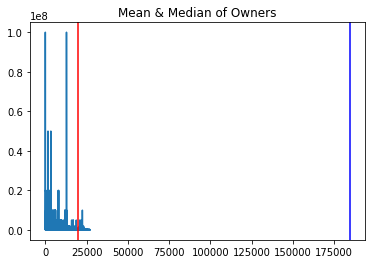

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

df['owners'].plot(title='Mean & Median of Owners')
plt.axvline(df['owners'].mean(),color='blue')
plt.axvline(df['owners'].median(),color='red')


In [137]:
guess = df['owners'].mean()
guess

184360.84949215144

In [68]:
df['price'].dtypes

dtype('float64')

In [0]:
errors = guess - df['owners']

In [0]:
mean_absolute_error = errors.abs().mean()

In [143]:
print(f'If we just guessed every game had {guess:,.0f} owners,')
print(f'we would be off by {mean_absolute_error:,.0f} on average.')

If we just guessed every game had 184,361 owners,
we would be off by 266,700 on average.


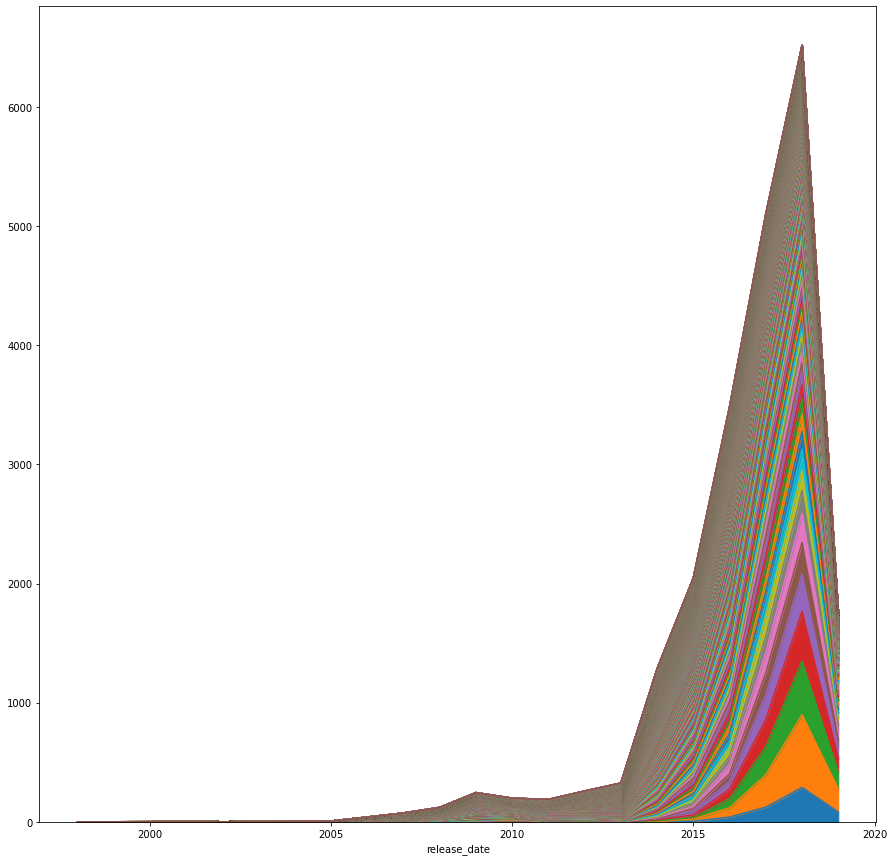

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

pd.crosstab(train['release_date'], train['positive_ratings']).plot.area(figsize=(15,15),legend=False)

In [0]:
# The status_group column is the target
target = 'owners'

# Get a dataframe with all train columns except the target
train_features = train.drop(columns=[target])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality.index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [72]:
train['owners'].mean()

181961.6805170822

In [73]:
print('Mean Baseline using 0 features')
guess = y_train.mean()
print(guess)

Mean Baseline using 0 features
181961.6805170822


In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(f'Linear Regression, dependent on: {features}')

Linear Regression, dependent on: ['release_date', 'english', 'required_age', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'price', 'Indie', 'Action', 'Casual', 'Adventure', 'Strategy', 'Simulation', 'Early Access', 'RPG', 'Free to Play', 'Puzzle', 'VR', 'Sports', 'Racing', 'Platformer', 'Nudity', 'Sexual Content', 'Visual Novel', 'Violent', 'Anime', 'Horror', 'Point & Click', 'Gore', 'Hidden Object', 'Multiplayer', 'FPS', 'Massively Multiplayer', 'Utilities', 'Design & Illustration', 'Animation & Modeling', 'windows', 'mac', 'linux', 'Single-player', 'Steam Achievements', 'Steam Trading Cards', 'Steam Cloud', 'Full controller support', 'Partial Controller Support', 'Multi-player', 'Steam Leaderboards', 'Online Multi-Player', 'Shared/Split Screen', 'Stats', 'Co-op', 'Local Multi-Player', 'Cross-Platform Multiplayer', 'Online Co-op', 'Local Co-op', 'Includes level editor', 'Steam Workshop', 'Captions available', 'In-App Purchases', 'MMO',

In [75]:
from sklearn.metrics import mean_absolute_error
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae= mean_absolute_error(y_train, y_pred)
print(f'Train Error: {mae:.2f} percentage points')
model.fit(X_train, y_train)
print('Validation Accuracy', model.score(X_val, y_val))

Train Error: 159288.08 percentage points
Validation Accuracy -0.6876958141426244


In [76]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8029547553093259


In [77]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.TargetEncoder(),  
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 -0.6876958141426244


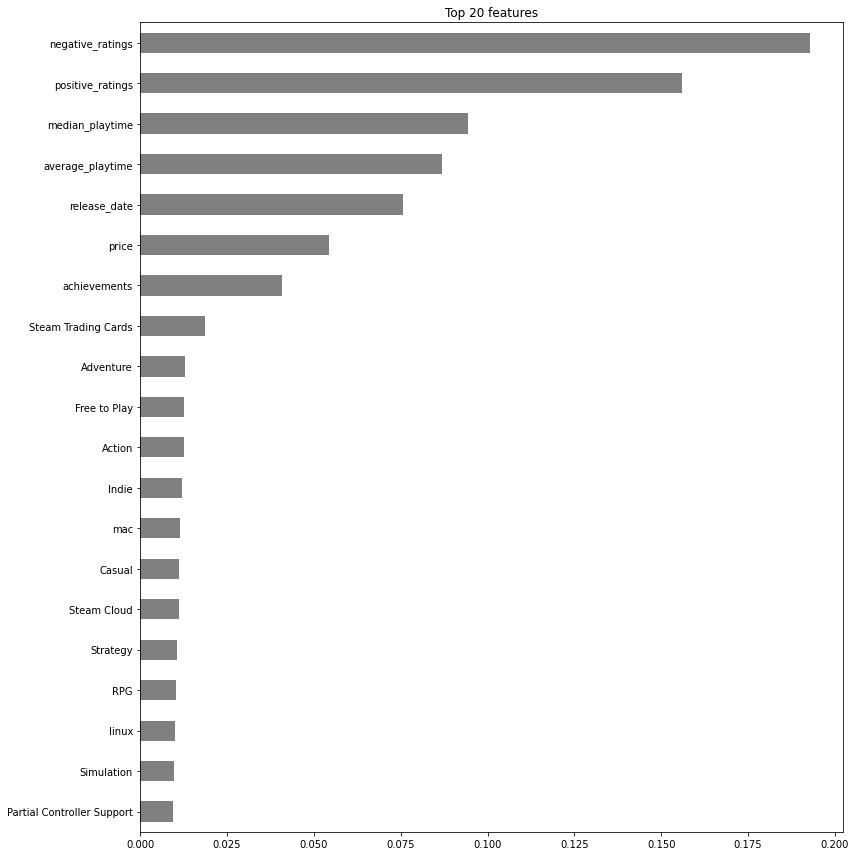

In [156]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');
plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.savefig('top 20 features.png')

In [79]:
column  = 'negative_ratings'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without negative_ratings: 0.7961218836565097
Validation Accuracy with negative_ratings: 0.8029547553093259
Drop-Column Importance for negative_ratings: 0.006832871652816208


In [80]:
column  = 'positive_ratings'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without positive_ratings: 0.7782086795937212
Validation Accuracy with positive_ratings: 0.8029547553093259
Drop-Column Importance for positive_ratings: 0.02474607571560472


In [81]:
column  = 'average_playtime'

# Fit without column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train.drop(columns=column), y_train)
score_without = pipeline.score(X_val.drop(columns=column), y_val)
print(f'Validation Accuracy without {column}: {score_without}')

# Fit with column
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Validation Accuracy with {column}: {score_with}')

# Compare the error with & without column
print(f'Drop-Column Importance for {column}: {score_with - score_without}')

Validation Accuracy without average_playtime: 0.8022160664819945
Validation Accuracy with average_playtime: 0.8029547553093259
Drop-Column Importance for average_playtime: 0.0007386888273314129


In [82]:
from xgboost import XGBClassifier

encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000,  # Number of estimators - with a lot, will depend on early stopping
    max_depth=7,  # Deeper trees to help with high cardinality features
    learning_rate=0.5,  # Let's try a higher learning rate
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='merror',
          early_stopping_rounds=50)

[0]	validation_0-merror:0.190997	validation_1-merror:0.220683
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.171976	validation_1-merror:0.212742
[2]	validation_0-merror:0.162096	validation_1-merror:0.209418
[3]	validation_0-merror:0.156371	validation_1-merror:0.206648
[4]	validation_0-merror:0.151847	validation_1-merror:0.20591
[5]	validation_0-merror:0.14566	validation_1-merror:0.200923
[6]	validation_0-merror:0.13795	validation_1-merror:0.200185
[7]	validation_0-merror:0.131579	validation_1-merror:0.199815
[8]	validation_0-merror:0.126454	validation_1-merror:0.198523
[9]	validation_0-merror:0.121053	validation_1-merror:0.198153
[10]	validation_0-merror:0.116667	validation_1-merror:0.196861
[11]	validation_0-merror:0.112281	validation_1-merror:0.197415
[12]	validation_0-merror:0.106787	validation_1-merror:0.197415
[13]	validation_0-merror:0.1034

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

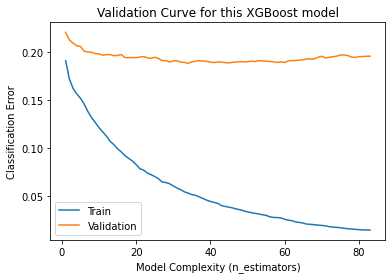

In [148]:
results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = list(range(1, len(train_error)+1))
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.title('Validation Curve for this XGBoost model')
#plt.ylim((0.18, 0.22)) # Zoom in
plt.legend();
plt.savefig('Validation model.png')